In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#### Pre-processing (Missing Values correction)

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

#Load the data into a pandas DataFrame
#Replace all missing information with NaN
miss = ['No Info','unknown amount']
df = pd.read_csv('CAX_Startup_Data.csv', na_values= miss)

#Work on the feature Industry of Company
#Replace NaN with 0 to make the work easier
df['Industry of company'] = df['Industry of company'].fillna(0)
#Combine values from two desired features
df.loc[df['Industry of company'] != 0,'Industry'] = df['Industry of company']
df.loc[df['Industry of company'] == 0,'Industry'] = df['Focus functions of company']
#Replace the created one into the original
df['Industry of company'] = df['Industry']
#Split names with a pipe, removing all character beyond it
sp_vol1 = df['Industry of company']
sp_vol2 = sp_vol1.str.split(pat= '|',n= 3, expand= True)
#Replace the created one into the original
df['Industry of company'] = sp_vol2[0]

#Check for features with a lot of missing values
nan_values = pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
nan_values["% NaN Values"] = (df.isna().sum()/len(df)*100)
nan_values["% NaN Values"].sort_values(ascending= False)
#Separate features with more than 35% of missing values
features_delete = nan_values.loc[nan_values["% NaN Values"] >= 35]
#Delete the mentioned features plus irrelevant ones
df.drop(df.columns[[0, 2, 5, 7, 8, 9, 10, 12, 13, 15, 60, 61, 67, 68, 79, 86, 95, 99, 100, 116]], axis= 1, inplace= True)

#Correct typo mistakes, capital missuses, space problems and redefine industry categories
df['Has the team size grown'].replace({'yes':'Yes'},inplace=True)
df['Has the team size grown'].replace({'YES':'Yes'},inplace=True)
df['Cloud or platform based serive/product?'].replace({'cloud':'Cloud'},inplace=True)
df['Local or global player'].replace({'GLOBAL':'Global'},inplace=True)
df['Local or global player'].replace({'GLObaL':'Global'},inplace=True)
df['Local or global player'].replace({'global':'Global'},inplace=True)
df['Local or global player'].replace({'local  ':'Local'},inplace=True)
df['Local or global player'].replace({'local':'Local'},inplace=True)
df['Local or global player'].replace({'LOCAL':'Local'},inplace=True)
df['Number of  Sales Support material'].replace({'high':'High'},inplace=True)
df['Number of  Sales Support material'].replace({'low':'Low'},inplace=True)
df['Number of  Sales Support material'].replace({'medium':'Medium'},inplace=True)
df['Focus on private or public data?'].replace({'no':'No'},inplace=True)
df['Focus on structured or unstructured data'].replace({'not applicable':'No'},inplace=True)
df['Focus on structured or unstructured data'].replace({'no':'No'},inplace=True)
df['Cloud or platform based serive/product?'].replace({'none':'None'},inplace=True)
df['Industry of company'].replace({'operation':'Operations'},inplace=True)
df['Industry of company'].replace({'operations':'Operations'},inplace=True)
df['Industry of company'].replace({'marketing':'Marketing'},inplace=True)
df['Industry of company'].replace({'Market Research':'Marketing'},inplace=True)
df['Industry of company'].replace({'Marketing,Sales,Risk,Operations':'Marketing'},inplace=True)
df['Industry of company'].replace({'targeted marketing':'Marketing'},inplace=True)
df['Industry of company'].replace({'marketing, sales':'Marketing'},inplace=True)
df['Industry of company'].replace({'Marketing,Sales':'Marketing'},inplace=True)
df['Industry of company'].replace({'Merchandising, Marketing':'Marketing'},inplace=True)
df['Industry of company'].replace({'technology':'Analytics'},inplace=True)
df['Industry of company'].replace({'analytics':'Analytics'},inplace=True)
df['Industry of company'].replace({'sales':'Sales'},inplace=True)
df['Industry of company'].replace({'software service':'Enterprise Software'},inplace=True)
df['Industry of company'].replace({'Software Development':'Enterprise Software'},inplace=True)
df['Industry of company'].replace({'software':'Enterprise Software'},inplace=True)
df['Industry of company'].replace({'many':'Enterprise Software'},inplace=True)
df['Industry of company'].replace({'enterprise':'Enterprise Software'},inplace=True)
df['Industry of company'].replace({'development, marketing, and administration':'Enterprise Software'},inplace=True)
df['Industry of company'].replace({'social media':'Social Media'},inplace=True)
df['Industry of company'].replace({'service':'Services'},inplace=True)
df['Industry of company'].replace({'research':'Market Research'},inplace=True)
df['Industry of company'].replace({'search':'Market Research'},inplace=True)
df['Industry of company'].replace({'Search':'Market Research'},inplace=True)
df['Industry of company'].replace({'web':'Social Media'},inplace=True)
df['Industry of company'].replace({'curated web':'Social Media'},inplace=True)
df['Industry of company'].replace({'conssumer web':'Social Media'},inplace=True)
df['Industry of company'].replace({'consumer web':'Social Media'},inplace=True)
df['Industry of company'].replace({'social networking':'Network / Hosting / Infrastructure'},inplace=True)
df['Industry of company'].replace({'social network':'Network / Hosting / Infrastructure'},inplace=True)
df['Industry of company'].replace({'networking':'Network / Hosting / Infrastructure'},inplace=True)
df['Industry of company'].replace({'CRM, Marketing, Human Resources':'CRM'},inplace=True)
df['Industry of company'].replace({'Customer Retention, Customer Feedback':'CRM'},inplace=True)
df['Industry of company'].replace({'game':'Gaming'},inplace=True)
df['Industry of company'].replace({'games':'Gaming'},inplace=True)
df['Industry of company'].replace({'strategy':'Strategy'},inplace=True)
df['Industry of company'].replace({'marketing, strategy':'Strategy'},inplace=True)
df['Industry of company'].replace({'advertising':'Advertising'},inplace=True)
df['Industry of company'].replace({'Travel Planning':'Travel'},inplace=True)
df['Industry of company'].replace({'mobile app development':'Mobile'},inplace=True)
df['Industry of company'].replace({'energy':'Energy'},inplace=True)
df['Industry of company'].replace({'security':'Security'},inplace=True)
df['Industry of company'].replace({'ecommerce':'E-Commerce'},inplace=True)
df['Industry of company'].replace({'Sales & Marketing':'Retail'},inplace=True)
df['Industry of company'].replace({'Solution providing':'Solution Providing'},inplace=True)
df['Industry of company'].replace({'Information management':'Information Management'},inplace=True)
df['Industry of company'].replace({'Risk':'Finance'},inplace=True)

#Replace missing values with the most frequent interval or nominal entry
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#The above gives you back an array, then it was converted into a DataFrame
statistics_database = pd.DataFrame(imp.fit_transform(df))

statistics_database.columns = ['STA', 'AGE', 'IAS', 'IND', 'SIZ', 'FUN', 'CON', 'INS', 'INA',
                               'NCO', 'NAD', 'SEN', 'EMP', 'PRE', 'REP', 'SSM', 'TOP', 'AVC',
                               'PAS', 'SAS', 'BIG', 'EXP', 'PSC', 'CAV', 'DAT', 'CDA', 'SDA',
                               'SUB', 'CPB', 'PLA', 'MOD', 'CAP', 'PAR', 'CRS', 'CRF', 'MLB',
                               'PAB', 'SAB', 'PRB', 'BDB', 'CCA', 'OWN', 'AGG', 'OOV', 'B2V',
                               'TOF', 'AYE', 'EAG', 'BEV', 'EDU', 'RED', 'REP', 'TIE', 'PRO',
                               'ESB', 'E10', 'TMS', 'REC', 'RES', 'SKI', 'TSC', 'DWF', 'PST',
                               'HYP', 'TTM', 'LTR', 'PPP', 'BAR', 'AWA', 'CHF', 'LRI', 'GPR',
                               'TPA', 'SOL', 'INC', 'TRE', 'DIS', 'NDC', 'EPY', 'SUR', 'TIM',
                               'AVT', 'PSE', 'PSO', 'PSG', 'PSM', 'PSL', 'PSD', 'PSB', 'PSP',
                               'PSS', 'PSD', 'PSL', 'PSC', 'PSF', 'PSI', 'PSR']

#Create a CSV file and store the features in it
with open('CAX_data_statistics.csv', 'w'):
    pass
statistics_database.to_csv('CAX_data_statistics.csv', index=False, header=True)

In [9]:
#Load the respective databases
X = pd.read_csv('CAX_Preprocessed_features_ADA.csv')
y = pd.read_csv('CAX_Preprocessed_target_ADA.csv')
information =pd.concat([X, y], axis=1)
DATA = pd.read_csv('CAX_data_statistics.csv')

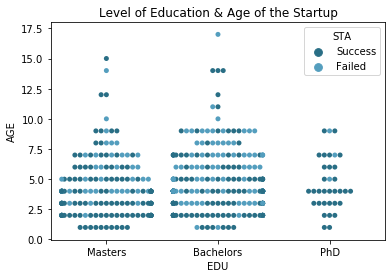

In [10]:
sns.swarmplot(x='EDU', y='AGE', hue='STA', data=DATA, palette='PuBuGn_d').set_title('Level of Education & Age of the Startup')
plt.savefig('Age of the Startup.png', dpi=300)

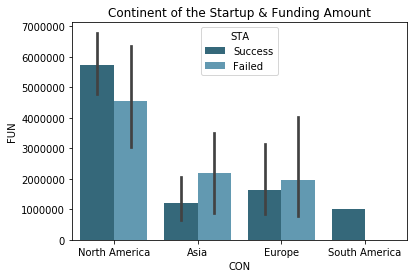

In [11]:
sns.barplot(x='CON', y='FUN', hue='STA', data=DATA, palette='PuBuGn_d').set_title('Continent of the Startup & Funding Amount')
plt.savefig('Continent of the Startup.png', dpi=300)

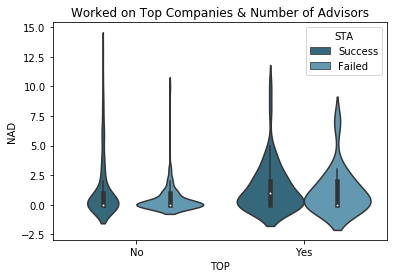

In [12]:
sns.violinplot(x='TOP', y='NAD', hue='STA', data=DATA, palette='PuBuGn_d').set_title('Worked on Top Companies & Number of Advisors')
plt.savefig('Number of Advisors.png', dpi=300)

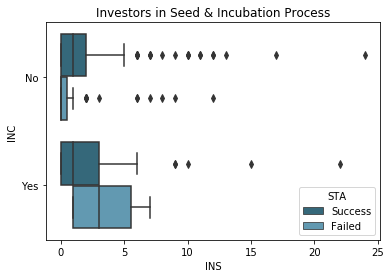

In [13]:
sns.boxplot(x='INS', y='INC',hue='STA', orient="h", data=DATA, palette='PuBuGn_d').set_title('Investors in Seed & Incubation Process')
plt.savefig('Investors in seed.png', dpi=300)

In [14]:
DATA.describe()


,AGE,IAS,FUN,INS,INA,NCO,NAD,SEN,EMP,REP,...,PSD,PSB,PSP,PSS,PSD.1,PSL.1,PSC.1,PSF,PSI,PSR
count,472.000000,472.000000,4.720000e+02,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,...,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,4.529661,98.438559,4.555934e+06,1.385593,0.516949,1.868644,1.016949,3.730932,60.915254,0.555085,...,5.295909,9.561983,2.986802,2.923319,4.136038,0.173725,0.419762,1.386060,1.183501,2.866525
std,2.446708,213.172320,8.440092e+06,2.841093,1.333756,1.143481,2.014736,2.516539,334.043409,1.186055,...,9.997315,10.635986,4.659032,5.261411,7.234741,1.810317,1.960668,6.184190,3.195067,2.855542
min,1.000000,-725.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000e+06,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,25.500000,1.000000e+06,0.000000,0.000000,2.000000,0.000000,3.000000,11.000000,0.000000,...,0.000000,6.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,6.000000,157.750000,4.500000e+06,1.000000,0.000000,2.250000,1.000000,5.000000,50.000000,1.000000,...,6.666667,16.742424,5.555556,5.555556,5.555556,0.000000,0.000000,0.000000,0.000000,5.000000
max,17.000000,1535.000000,7.700000e+07,24.000000,9.000000,7.000000,13.000000,24.000000,5000.000000,10.000000,...,80.000000,50.000000,25.000000,33.333333,44.444444,33.333333,20.000000,78.571429,33.333333,11.000000
